In [1]:
# from urllib.request import urlopen

# shakespeare = urlopen('http://composingprograms.com/shakespeare.txt')

# words= set(shakespeare.read().decode().split())

# w for w in words if len(w) == 6 and w[::-1] in words

In [2]:
max(7.5, 9.5)
pow(100, 2)
pow(2, 100)
max(1, -2, 3, -4)
max(min(1, -2), min(pow(3, 5), -4))

-2

In [3]:
from math import sqrt
sqrt(256)

16.0

In [4]:
from operator import add, sub, mul
add(14, 28)
sub(100, mul(7, add(8, 4)))

16

In [5]:
from math import pi
pi * 71 / 223

1.0002380197528042

In [6]:
f = max
f(1, 2, 3)

# max = 5
# max(5, 4)
# 运行即报错

3

In [7]:
x, y = 3, 4.5
y, x = x, y
print(x)
print(y)

4.5
3


In [8]:
# print不是纯函数，其返回值是None
print(print(1), print(2))

1
2
None None


In [9]:
def square(x):
    return mul(x, x)
square(21)
square(square(3))

81

函数定义通常包含描述函数的文档，称为文档字符串，它必须与函数体一起缩进。文档字符串通常是三重引用的。第一行在一行中描述了该函数的工作。以下几行可以描述参数并阐明函数的行为：

In [10]:
def pressure(v, t, n):
        """Compute the pressure in pascals of an ideal gas.

        Applies the ideal gas law: http://en.wikipedia.org/wiki/Ideal_gas_law

        v -- volume of gas, in cubic meters
        t -- absolute temperature in degrees kelvin
        n -- particles of gas
        """
        k = 1.38e-23  # Boltzmann's constant
        return n * k * t / v

help(pressure)

Help on function pressure in module __main__:

pressure(v, t, n)
    Compute the pressure in pascals of an ideal gas.
    
    Applies the ideal gas law: http://en.wikipedia.org/wiki/Ideal_gas_law
    
    v -- volume of gas, in cubic meters
    t -- absolute temperature in degrees kelvin
    n -- particles of gas



In [11]:
# 提供参数的默认值
def pressure(v, t, n=6.022e23):
        """Compute the pressure in pascals of an ideal gas.

        v -- volume of gas, in cubic meters
        t -- absolute temperature in degrees kelvin
        n -- particles of gas (default: one mole)
        """
        k = 1.38e-23  # Boltzmann's constant
        return n * k * t / v

In [12]:
0 == -0

True

In [13]:
def fib(n):
    """ 斐波那契 """
    pred, curr = 0, 1
    k = 2
    while k < n:
        pred, curr = curr, pred + curr
        k = k + 1
    return curr

result = fib(8)
result

13

In [14]:
# 测试语句，将测试语句单独封装放在_test.py中
def fib_test():
    assert fib(2) == 1, 'The 2nd fibonacci number should be 1'

Doctest

Python 提供了一种方便的方法，可以将简单的测试直接放置在函数的文档字符串中。文档字符串的第一行应包含函数的单行描述，后跟一个空行。随后可能会详细描述参数和行为。此外，文档字符串可能包括调用该函数的示例交互式会话：

In [15]:
def sum_naturals(n):
    """ 计算前n个自然数的和 
    >>> sum_naturals(10)
    55
    >>> sum_naturals(100)
    5050
    """
    total, k = 0, 1
    while k <= n:
        total, k = total + k, k + 1
    return total

help(sum_naturals)

from doctest import testmod
testmod()

Help on function sum_naturals in module __main__:

sum_naturals(n)
    计算前n个自然数的和 
    >>> sum_naturals(10)
    55
    >>> sum_naturals(100)
    5050



TestResults(failed=0, attempted=2)

To verify the doctest interactions for only a single function, we use a `doctest` function called `run_docstring_examples`. This function is (unfortunately) a bit complicated to call. Its first argument is the function to test. The second should always be the result of the expression `globals()`, a built-in function that returns the global environment. The third argument is True to indicate that we would like "verbose" output: a catalog of all tests run.

In [16]:
from doctest import run_docstring_examples
run_docstring_examples(sum_naturals, globals(), True)

Finding tests in NoName
Trying:
    sum_naturals(10)
Expecting:
    55
ok
Trying:
    sum_naturals(100)
Expecting:
    5050
ok


In [17]:
# 高阶函数, 函数作为参数
def summation(n, term):
    total, k = 0, 1
    while k <= n:
        total, k = total + term(k), k + 1
    return total

def cube(x):
    return x*x*x

def sum_cubes(n):
    return summation(n, cube)

def identity(x):
    return x

def sum_naturals(n):
    return summation(n, identity)

result = sum_cubes(3)
result

36

In [18]:
def pi_term(x):
    return 8 / ((4 * x - 3) * (4 * x - 1))

def pi_sum(n):
    return summation(n, pi_term)

# pi的近似
pi_sum(1e6)

3.141592153589902

递归扩展来获得黄金比的连分数

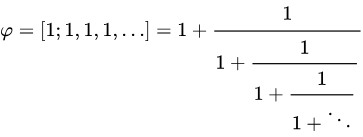

In [19]:
# 黄金分割
def improve(update, close, guess=1):
    while not close(guess):
        guess = update(guess)
    return guess

def golden_update(guess):
    return 1 / guess + 1

def square_close_to_successor(guess):
    return approx_eq(guess * guess, guess + 1)

def approx_eq(x, y, tolerance=1e-15):
    return abs(x - y) < tolerance

improve(golden_update, square_close_to_successor)

# 精确闭式解
from math import sqrt
phi = 1 / 2 + sqrt(5) / 2
def improve_test():
    approx_phi = improve(golden_update, square_close_to_successor)
    assert approx_eq(phi, approx_phi), 'phi differs from its approximation'

improve_test()

In [20]:
# 嵌套定义
def average(x, y):
    return (x + y) / 2

def improve(update, close, guess=1):
    while not close(guess):
        guess = update(guess)
    return guess

def approx_eq(x, y, tolerance=1e-3):
    return abs(x - y) < tolerance

def sqrt_appro(a):
    def sqrt_update(x):
        return average(x, a/x)
    def sqrt_close(x):
        return approx_eq(x * x, a)
    return improve(sqrt_update, sqrt_close)
sqrt_appro(256)

16.00000352670594

In [21]:
# return值为函数
def compose1(f, g):
    def h(x):
        return f(g(x))
    return h

def square(x):
    return x * x

def successor(x):
    return x + 1

square_successor = compose1(square, successor)
result = square_successor(12)
result

169

In [22]:
def improve(update, close, guess=1):
    while not close(guess):
        guess = update(guess)
    return guess

def approx_eq(x, y, tolerance=1e-3):
    return abs(x - y) < tolerance

def newton_update(f, df):
    def update(x):
        return x - f(x) / df(x)
    return update

def find_zero(f, df):
    def near_zero(x):
        return approx_eq(f(x), 0)
    return improve(newton_update(f, df), near_zero)

def power(x, n):
    product, k = 1, 0
    while k < n:
        product, k = product * x, k + 1
    return product

def nth_root_of_a(n, a):
    def f(x):
        return power(x, n) - a
    def df(x):
        return n * power(x, n-1)
    return find_zero(f, df)

nth_root_of_a(3, 64)

4.000017449510739

In [23]:
def curried_pow(x):
    def h(y):
        return pow(x, y)
    return h

curried_pow(2)(3)

def map_to_range(start, end, f):
    while start < end:
        print(f(start))
        start = start + 1
map_to_range(0, 10, curried_pow(2))

1
2
4
8
16
32
64
128
256
512


In [24]:
def curry2(f):
    def g(x):
        def h(y):
            return f(x, y)
        return h
    return g

def uncurry(g):
    def f(x, y):
        return g(x)(y)
    return f

pow_curried = curry2(pow)
pow_curried(2)(5)   # = 32
map_to_range(0, 10, pow_curried(2))


1
2
4
8
16
32
64
128
256
512


In [25]:
uncurry(pow_curried)(2, 5)

32

In [26]:
s = lambda x: x * x
s(12)

144

In [27]:
def compose1(f, g):
    return lambda x: f(g(x))

f = compose1(lambda x : x * x, lambda y : y + 1)

f(12)

169

在Python中，`@` 符号被称为装饰器（Decorator），它提供了一种简洁的语法来修改或增强函数或类的行为。装饰器允许你在不修改原始函数定义的情况下，对函数的行为进行包装或修改。

在你的例子中，`@trace` 是一个装饰器，它被应用于函数 `triple` 上面。这意味着 `trace` 函数将会被调用，然后将函数 `triple` 作为参数传递给 `trace` 函数。`trace` 函数返回的结果（一个新的函数）将会替代原始的 `triple` 函数。

在这个例子中，`trace` 函数接受一个函数 `fn` 作为参数，然后返回一个新的函数 `wrapped`。在 `wrapped` 函数内部，它首先会打印一条带有 `fn` 和参数 `x` 的消息，然后调用原始函数 `fn`，并将参数 `x` 传递给它。最后，`wrapped` 函数返回原始函数的结果。

因此，当你调用 `triple(12)` 时，实际上会调用 `wrapped(12)`，而 `wrapped` 函数中会输出 `-> triple ( 12 )`，然后调用原始的 `triple` 函数，返回结果 `36`。

In [28]:
def trace(fn):
    def wrapped(x):
        print('->', fn, '(', x, ')')
        return fn(x)
    return wrapped

@trace
def triple(x):
    return 3 * x

triple(12)

-> <function triple at 0x0000020FCCB31430> ( 12 )


36

In [29]:
# 递归
def sum_digits(n):
    """ 返回各位数字之和 """
    if n < 10:
        return n
    else:
        all_but_last, last = n // 10, n % 10
        return sum_digits(all_but_last) + last
sum_digits(11408855402054064613470328848384)

126

In [30]:
# 相互递归
def is_even(n):
    if n == 0:
        return True
    else:
        return is_odd(n-1)

def is_odd(n):
    if n == 0:
        return False
    else:
        return is_even(n-1)

is_even(4)

True

In [31]:
# 将互递归函数变成单个递归函数
def is_even(n):
    if n == 0:
        return True
    else:
        if (n-1) == 0:
            return False
        else:
            return is_even((n-1)-1)
is_even(8)

True

In [32]:
def cascade(n):
    print(n)
    if n >= 10:
        cascade(n // 10)
        print(n)

cascade(2013)

2013
201
20
2
20
201
2013


In [33]:
# 树回归
# 6 = 2 + 4
# 6 = 1 + 1 + 4
# 6 = 3 + 3
# 6 = 1 + 2 + 3
# 6 = 1 + 1 + 1 + 3
# 6 = 2 + 2 + 2
# 6 = 1 + 1 + 2 + 2
# 6 = 1 + 1 + 1 + 1 + 2
# 6 = 1 + 1 + 1 + 1 + 1 + 1
def count_partitions(n, m):
    if n == 0:
        return 1
    elif n < 0:
        return 0
    elif m == 0:
        return 0
    else :
        return count_partitions(n-m, m) + count_partitions(n, m-1)

count_partitions(6, 4)

9

Python 包含三种原生数值类型：整数 (int)、实数 (float) 和复数 (complex)。

In [34]:
type(1+2j)

complex

## Data Abstraction

In [35]:
# 表示有理数，而不是使用内置数据格式表示
from math import gcd
def rational(n, d):
    g = gcd(n, d)    # 最大公约数  greatest common denominator
    return [n // g, d // g]

def numer(x):
    return x[0]

def denom(x):
    return x[1]

def print_rational(x):
    print(numer(x), '/', denom(x))

def add_rationals(x, y):
    """
    有理数相加
    """
    nx, dx = numer(x), denom(y)
    ny, dy = numer(y), denom(y)
    return rational(nx * dy + ny * dx, dx * dy)

def mul_rationals(x, y):
    return rational(numer(x) * numer(y), denom(x) * denom(y))

def rationals_are_equal(x, y):
    return numer(x) * denom(y) == numer(y) * denom(x)

half = rational(1, 2)
third = rational(1, 3)

print_rational(mul_rationals(half, third))
print_rational(add_rationals(third, third))

1 / 6
2 / 3


In [36]:
def pair(x, y):
    def get(index):
        if index == 0:
            return x
        elif index == 1:
            return y
    return get

def select(p, i):
    return p(i)

p = pair(20, 14)
select(p, 0)

20

In [37]:
# sequence unpacking
pairs = [[1, 2], [2, 2], [2, 3], [4, 4]]
same_count = 0
for x, y in pairs:
    if x == y:
        same_count = same_count + 1
same_count

2

In [38]:
for _ in range(3):
    print("go cs61A")

go cs61A
go cs61A
go cs61A


### 列表表达式
The general form of a list comprehension is:

`[<map expression> for <name> in <sequence expression> if <filter expression>]`

为了计算列表推导式，Python 计算 `<sequence expression>`，它必须返回一个可迭代的值。然后，对于按顺序排列的每个元素，元素值绑定到 `<name>`，对过滤表达式进行求值，如果它产生真值，则对映射表达式进行求值。映射表达式的值被收集到一个列表中。

In [39]:
odds = [1, 3, 5, 7, 9]
print([x + 1 for x in odds])
print([x for x in odds if 25 % x == 0])

[2, 4, 6, 8, 10]
[1, 5]


In [40]:
def divisors(n):
    return [1] + [x for x in range(2, n) if n % x == 0]

# 计算完美数：完美数 = 其除数之和的正整数
print([n for n in range(1, 1000) if sum(divisors(n)) == n])

# 在给定面积的情况下找到具有整数边长的矩形的最小周长。
def width(area, height):
    assert area % height == 0
    return area // height

def perimeter(width, height):
    return 2 * width + 2 * height

def minimum_perimeter(area):
    heights = divisors(area)
    perimeters = [perimeter(width(area, h), h) for h in heights]
    return min(perimeters)

minimum_perimeter(80)

[1, 6, 28, 496]


36

### 高阶函数

In [41]:
def apply_to_all(map_fn, s):
    return [map_fn(x) for x in s]

def keep_if(filter_fn, s):
    return [x for x in s if filter_fn(x)]

def reduce(reduce_fn, s, initial):
    reduced = initial
    for x in s:
        reduced = reduce_fn(reduced, x)
    return reduced

# simple test
from operator import mul
print('simple test: ', reduce(mul, [2, 4, 8], 1))

# 使用高阶函数来计算完美数

# n的所有除数s
def divisors_of(n):
    divides_n = lambda x : n % x == 0
    return [1] + keep_if(divides_n, range(2, n))

# simple test
print('simple test: ', divisors_of(28))

from operator import add
def sum_of_divisors(n):
    return reduce(add, divisors_of(n), 0)

def perfect(n):
    return sum_of_divisors(n) == n

keep_if(perfect, range(1, 1000))


simple test:  64
simple test:  [1, 2, 4, 7, 14]


[1, 6, 28, 496]

**Conventional Names**. In the computer science community, the more common name for apply_to_all is map and the more common name for keep_if is filter. In Python, the built-in map and filter are generalizations of these functions that do not return lists. These functions are discussed in Chapter 4. The definitions above are equivalent to applying the list constructor to the result of built-in map and filter calls.

```
>>> apply_to_all = lambda map_fn, s: list(map(map_fn, s))
>>> keep_if = lambda filter_fn, s: list(filter(filter_fn, s))
```
The reduce function is built into the functools module of the Python standard library. In this version, the initial argument is optional.

```
>>> from functools import reduce
>>> from operator import mul
>>> def product(s):
        return reduce(mul, s)
>>> product([1, 2, 3, 4, 5])
120
```

In Python programs, it is more common to use list comprehensions directly rather than higher-order functions, but both approaches to sequence processing are widely used.

切片：http://getpython3.com/diveintopython3/native-datatypes.html#slicinglists

In [42]:
# 成员资格(membership)
digits = [1, 8, 2, 8]
print(2 in digits)
print(1828 not in digits)

# 切片
print(digits[0:2])
print(digits[1:])

True
True
[1, 8]
[8, 2, 8]


### 字符串

more to read : http://getpython3.com/diveintopython3/strings.html

字符串文字可以表示任意文本，用单引号或双引号括起来。

In [43]:
print('i am a string')
print("i am a string")
city = 'Berkeley'
print(city + ', CA')
print('here' in "Where is waldo?")

# 多行文字。字符串不限于单行。三引号分隔跨多行的字符串文字。
"""The Zen of Python
claims, Readability counts.
Read more: import this."""

# 强制转换
print(str(2) + ' is an element of ' + str(digits))

i am a string
i am a string
Berkeley, CA
True
2 is an element of [1, 8, 2, 8]


### Trees

在列表中嵌套列表会带来复杂性。树是一种基本的数据抽象，它对层次值的构造和操作方式施加了规则性。

一棵树有一个根标签和一系列分支。树的每个分支都是一棵树。没有树枝的树称为叶子。一棵树中包含的任何树都称为该树的子树（例如分支的分支）。树的每个子树的根称为该树中的节点。

树的数据抽象由构造函数`tree`、选择器`label`和`branches`。我们从一个简化版本开始。

只有当一棵树有根标签并且所有分支也是树时，它才是良构的。 `is_tree` 函数应用于树构造函数以验证所有分支是否格式良好。

`is_leaf` 函数检查树是否有分支。

In [44]:
def tree(root_label, branches=[]):
    for branch in branches:
        assert is_tree(branch), 'branches must be trees'
    return [root_label] + list(branches)

def label(tree):
    return tree[0]

def branches(tree):
    return tree[1:]

def is_tree(tree):
    if type(tree) != list or len(tree) < 1:
        return False
    for branch in branches(tree):
        if not is_tree(branch):
            return False
    return True

def is_leaf(tree):
    return not branches(tree)

In [45]:
t = tree(3, [tree(1), tree(2, [tree(1), tree(1)])])
print(t)
print(label(t))
print(branches(t))
print(label(branches(t)[1]))
print(is_leaf(t))
print(is_leaf(branches(t)[0]))

[3, [1], [2, [1], [1]]]
3
[[1], [2, [1], [1]]]
2
False
True


In [46]:
def fib_tree(n):
    if n == 0 or n == 1:
        return tree(n)
    else:
        left, right = fib_tree(n-2), fib_tree(n-1)
        fib_n = label(left) + label(right)
        return tree(fib_n, [left, right])

print ( fib_tree(5) )

def count_leaves(tree):
    if is_leaf(tree):
        return 1
    else:
        branch_counts = [count_leaves(b) for b in branches(tree)]
        return sum(branch_counts)

print (count_leaves(fib_tree(5)))
    

[5, [2, [1], [1, [0], [1]]], [3, [1, [0], [1]], [2, [1], [1, [0], [1]]]]]
8


In [47]:
# 分区树
def partition_tree(n, m):
    if n == 0:
        return tree(True)
    elif n < 0 or m == 0:
        return tree(False)
    else:
        left = partition_tree(n-m, m)
        right = partition_tree(n, m-1)
        return tree(m, [left, right])
    
print (partition_tree(2, 2))

def print_parts(tree, partition=[]):
    if is_leaf(tree):
        if label(tree):
            print('+'.join(partition))
    else:
        left, right = branches(tree)
        m = str(label(tree))
        print_parts(left, partition + [m])
        print_parts(right, partition)

print_parts(partition_tree(6, 4))


[2, [True], [1, [1, [True], [False]], [False]]]
4+2
4+1+1
3+3
3+2+1
3+1+1+1
2+2+2
2+2+1+1
2+1+1+1+1
1+1+1+1+1+1


In [48]:
# def right_binarize(tree):
#     """Construct a right-branching binary tree"""
#     if is_leaf(tree):
#         return tree
#     if len(tree) > 2:
#         tree = [tree[0], tree[1:]]
#     return [right_binarize(b) for b in tree]

# right_binarize([1, 2, 3, 4, 5, 6, 7])

### 链表 Linked Lists
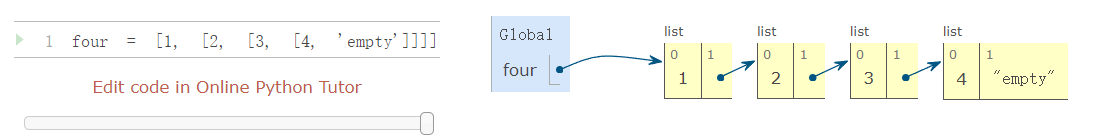

In [49]:
empty = 'empty'
def is_link(s):
    """如果 s 为空或者是(first, rest)对, 则 s 是一个链表。"""
    return s == 'empty' or (len(s) == 2 and is_link(s[1]))

def link(first, rest):
    """构建链表"""
    assert is_link(rest), "rest must be a linked list"
    return [first, rest]

def first(s):
    """返回链表的第一个元素"""
    assert is_link(s), "first only applies to linked lists."
    assert s != empty, "empty linked list has no first element."
    return s[0]

def rest(s):
    """返回链表的剩余元素"""
    assert is_link(s), "rest only applies to linked lists."
    assert s != empty, "empty linked list has no rest"
    return s[1]

four = link(1, link(2, link(3, link(4, empty))))
print(first(four))
print(rest(four))

def len_link(s):
    """返回链表的长度"""
    length = 0
    while s!= empty:
        s, length = rest(s), length + 1
    return length

def getitem_link(s, i):
    """返回链表 s 索引 i 处的元素。"""
    while i > 0:
        s, i = rest(s), i - 1
    return first(s)

print ( len_link(four) )
print (getitem_link(four, 1))

# 递归
def len_link_recursive(s):
    if s == empty:
        return 0
    return 1 + len_link_recursive(rest(s))

def getitem_link_recursive(s, i):
    if i == 0:
        return first(s)
    return getitem_link_recursive(rest(s), i - 1)

print ( len_link_recursive(four) )
print (getitem_link_recursive(four, 1))


1
[2, [3, [4, 'empty']]]
4
2
4
2


链表的转化、组和

In [50]:
def extend_link(s, t):
    """组合链表"""
    assert is_link(s) and is_link(t)
    if s == empty:
        return t
    else:
        return link(first(s), extend_link(rest(s), t))

# simple test
four = link(1, link(2, link(3, link(4, empty))))
print( four )
print( extend_link(four, four) )

def apply_to_all_link(f, s):
    """对链表中的元素进行f操作"""
    assert is_link(s)
    if s == empty:
        return s
    else:
        return link(f(first(s)), apply_to_all_link(f, rest(s)))

# simple test
print ( apply_to_all_link(lambda x: x*x, four))

def keep_if_link(f, s):
    """返回一个列表，其中包含 s 中 f(e) 为 true 的元素。"""
    assert is_link(s)
    if s == empty:
        return s
    else:
        kept = keep_if_link(f, rest(s))
        if f(first(s)):
            return link(first(s), kept)
        else:
            return kept
# simple test
print ( keep_if_link(lambda x: x % 2 == 0, four))

def join_link(s, separator):
    """返回 s 中所有元素的字符串，并用分隔符分隔"""
    if s == empty:
        return ""
    elif rest(s) == empty:
        return str(first(s))
    else:
        return str(first(s)) + separator +  join_link(rest(s), separator)
# simple test
print ( join_link(four, ", "))

[1, [2, [3, [4, 'empty']]]]
[1, [2, [3, [4, [1, [2, [3, [4, 'empty']]]]]]]]
[1, [4, [9, [16, 'empty']]]]
[2, [4, 'empty']]
1, 2, 3, 4


In [51]:
# 使用链表和递归解决分区问题
def partitions(n, m):
    """使用最多 m 的部分返回 n 的分区的链表。每个分区都表示为一个链接列表。"""
    if n == 0:
        return link(empty, empty)
    elif n < 0 or m == 0:
        return empty
    else:
        using_m = partitions(n-m, m)
        with_m = apply_to_all_link(lambda s: link(m, s), using_m)
        without_m = partitions(n, m-1)
        return extend_link(with_m, without_m)

def print_partitions(n, m):
    lists = partitions(n, m)
    strings = apply_to_all_link(lambda s: join_link(s, "+"), lists)
    print(join_link(strings, "\n"))

print_partitions(6, 4)

4+2
4+1+1
3+3
3+2+1
3+1+1+1
2+2+2
2+2+1+1
2+1+1+1+1
1+1+1+1+1+1


## 可变数据 (Mutable Data)
List 

Tuples 

Dictionaries

In [52]:
from datetime import date
tues = date(2014, 5, 13)
print(date(2014, 5, 19) - tues)
print(tues.year)
print(tues.strftime('%A, %B %d'))

6 days, 0:00:00
2014
Tuesday, May 13


In [53]:
# 列表操作
chinese = ['coin', 'string', 'myraid']
suits = chinese

suits.pop()
suits.remove('string')
suits.append('cup')
suits.extend(['sword', 'club'])
suits[2] = 'spade'
print(suits)

suits[0:2] = ['heart', 'diamond']
print(suits)
print(chinese)  # suits 和 chinese 都绑定在同一个对象上

# copy list
nest = list(suits)
nest[0] = suits
print(nest)

# also change nest
suits.insert(2, 'Joker')
print(nest)

# also change suits
nest[0].pop(2)
print(suits)

# 列表内容是否相同
print(suits is nest[0])
print (suits is ['heart', 'diamond', 'spade', 'club'])
print (suits == ['heart', 'diamond', 'spade', 'club'])

from unicodedata import lookup
[lookup('WHITE ' + s.upper() + ' SUIT') for s in suits]

['coin', 'cup', 'spade', 'club']
['heart', 'diamond', 'spade', 'club']
['heart', 'diamond', 'spade', 'club']
[['heart', 'diamond', 'spade', 'club'], 'diamond', 'spade', 'club']
[['heart', 'diamond', 'Joker', 'spade', 'club'], 'diamond', 'spade', 'club']
['heart', 'diamond', 'spade', 'club']
True
False
True


['♡', '♢', '♤', '♧']

插入、排序和反转列表的方法。所有这些变异操作都会改变列表的值；他们不会创建新的列表对象。

In [54]:
# tuples 内置类型
print (1, 2+3)
print ("the", 1, ("and", "only"))
print (type((10, 20)))
print (())
print ((10, ))

1 5
the 1 ('and', 'only')
<class 'tuple'>
()
(10,)


与列表一样，元组具有有限长度并支持元素选择。它们还有一些可用于列表的方法，例如`count`和`index`。

元组是不可变的,虽然无法更改元组中的元素，但可以更改元组中包含的可变元素的值。

In [55]:
code = ("up", "up", "down","down") + ("left", "right") * 2
print ( len(code) )
print ( code[3] )
print ( code.count("down"))
print ( code.index("left"))

nest = (10, 20, [30, 40])
print ( nest )
nest[2].pop()
print ( nest )

8
down
2
4
(10, 20, [30, 40])
(10, 20, [30])


### 字典
字典是Python的内置数据类型，用于存储和操作对应关系。字典包含键值对，其中键和值都是对象。字典的目的是提供用于存储和检索值的抽象，这些值不是按连续整数索引，而是按描述性键索引。

字符串通常用作键，因为字符串是事物名称的常规表示形式。

字典类型还支持对整个字典的内容进行迭代的各种方法。`keys`,`values`,  `items` 都返回可迭代值。

In [56]:
numerals = {'I': 1.0, 'V': 5.0, 'X': 10}
# index dictionaries
numerals['X']
numerals['I'] = 1
numerals['L'] = 50  #添加一个新的键值对
print(numerals)
print(sum(numerals.values()))

# 键值对列表转为字典
print (dict([(3, 9), (4, 16), (5, 25)]))

# get
print ( numerals.get('A', 0) )
print ( numerals.get('V', 0) )

# 
{x: x * x for x in range(3, 7)}

{'I': 1, 'V': 5.0, 'X': 10, 'L': 50}
66.0
{3: 9, 4: 16, 5: 25}
0
5.0


{3: 9, 4: 16, 5: 25, 6: 36}

非本地分配

In [57]:
# nonlocal 的使用
def make_withdraw(balance):
    def withdraw(amount):
        nonlocal balance
        if amount > balance:
            return 'Insufficient funds'
        balance = balance - amount
        return balance
    return withdraw

wd = make_withdraw(20)
print (wd(5))   # 20 - 5
print (wd(3))   # 15 - 3

wd2 = make_withdraw(8)
print (wd2(8))

15
12
0


Implementing Lists and Dictionaries

In [58]:
def mutable_link():
    """返回可变链表的功能实现:len, getitem, push_first, pop_first, str"""
    contents = empty
    def dispatch(message, value = None):
        nonlocal contents
        if message == 'len':
            return len_link(contents)
        elif message == 'getitem':
            return getitem_link(contents, value)
        elif message == 'push_first':
            contents = link(value, contents)
        elif message == 'pop_first':
            f = first(contents)
            contents = rest(contents)
            return f
        elif message == 'str':
            return join_link(contents, ", ")
    return dispatch

def to_mutable_link(source):
    s = mutable_link()
    for element in reversed(source):
        s('push_first', element)
    return s

suits = ['heart', 'diamond', 'spade', 'club']
s = to_mutable_link(suits)
print (type(s))
print (s('str'))
s('pop_first')
print (s('str'))

<class 'function'>
heart, diamond, spade, club
diamond, spade, club


In [59]:
# python内置字典的实现方式的效率远超下列实现方式
def dictionary():
    """实现字典"""
    records = []
    def getitem(key):
        matches = [r for r in records if r[0] == key]
        if len(matches) == 1:
            key, value = matches[0]
            return value
    def setitem(key, value):
        nonlocal records
        non_matches = [r for r in records if r[0]!= key]
        records = non_matches + [[key, value]]
    def dispatch(message, key=None, value=None):
        if message == 'getitem':
            return getitem(key)
        elif message == 'setitem':
            setitem(key, value)
    return dispatch
d = dictionary()
d('setitem', 3, 9)
d('setitem', 4, 16)

print(d('getitem', 3))
print(d('getitem', 4))

9
16


In [60]:
def account(initial_balance):
    def deposit(amount):
        dispatch['balance'] += amount
        return dispatch['balance']
    def withdraw(amount):
        if amount > dispatch['balance']:
            return 'Insufficient funds'
        dispatch['balance'] -= amount
        return dispatch['balance']
    dispatch = {'deposit': deposit,
                'withdraw': withdraw,
                'balance': initial_balance}
    return dispatch

def withdraw(account, amount):
    return account['withdraw'](amount)

def deposit(account, amount):
    return account['deposit'](amount)

def check_balance(account):
    return account['balance']

a = account(20)
print (deposit(a, 5))
print (withdraw(a, 17))
print (check_balance(a))

25
8
8


In [61]:
from email.errors import NonASCIILocalPartDefect
from operator import add, sub, mul, truediv

def adder(a, b, c):
    """加法器: a + b = c"""
    return make_ternary_constraint(a, b, c, add, sub, sub)

def make_ternary_constraint(a, b, c, ab, ca, cb):
    def new_value():
        av, bv, cv = [connector['has_val']() for connector in (a, b, c)]
        if av and bv:
            c['set_val'](constraint, ab(a['val'], b['val']))
        elif av and cv:
            b['set_val'](constraint, ca(c['val'], a['val']))
        elif bv and cv:
            a['set_val'](constraint, cb(c['val'], b['val']))
    def forget_value():
        for connector in (a, b, c):
            connector['forget'](constraint)
    constraint = {'new_val': new_value, 'forget': forget_value}
    for connector in (a, b, c):
        connector['connect'](constraint)
    return constraint

def multiplier(a, b, c):
    """ a * b = c"""
    return make_ternary_constraint(a, b, c, mul, truediv, truediv)

def constant(connector, value):
    """connector = value"""
    constraint = []
    connector['set_val'](constraint, value)
    return constraint

def connector(name = None):
    """connector between constraints"""
    informant = None
    constraints = []
    def set_value(source, value):
        nonlocal informant
        val = connector['val']
        if val is None:
            informant, connector['val'] = source, value
            if name is not None:
                print(name, '=', value)
            inform_all_except(source, 'new_val', constraints)
        else:
            if val != value:
                print('Contradiciton detected:', val, 'vs', value)
    def forget_value(source):
        nonlocal informant
        if informant == source:
            informant, connector['val'] = None, None
            if name is not None:
                print(name, 'is forgotten')
            inform_all_except(source, 'forget', constraints)
    connector = {'val': None,
                 'set_val' : set_value,
                 'forget': forget_value,
                 'has_val': lambda: connector['val'] is not None,
                 'connect': lambda source: constraints.append(source)}
    return connector

def inform_all_except(source, message, constraints):
    for c in constraints:
        if c != source:
            c[message]()

## 类与对象

In [62]:
# __init__ : 构造函数
class Account:
    def __init__(self, account_holder):
        self.balance = 0
        self.holder = account_holder
a = Account('Kirk')
print(a.balance, a.holder)

b = Account('Spock')
b.balance = 200
print ([acc.balance for acc in (a, b)])

print ( a is not b )

c = a 
print (c is a)

0 Kirk
[0, 200]
True
True


对象方法也由类语句套件中的 def 语句定义。下面，存款和取款都被定义为 Account 类对象的方法。

In [63]:
class Account:
    # constructor
    def __init__(self, account_holder):
        self.balance = 0
        self.holder = account_holder
    # Methods
    def deposit(self, amount):
        self.balance = self.balance + amount
        return self.balance
    def withdraw(self, amount):
        if amount > self.balance:
            return "Insufficient funds"
        self.balance = self.balance - amount
        return self.balance

spock_account = Account('Spock')
spock_account.deposit(100)
spock_account.withdraw(200)

'Insufficient funds'

In [64]:
# 内置函数
print (getattr(spock_account, 'balance'))  # getattr behaves exactly like dot notation
print (hasattr(spock_account, 'deposit'))

# function 与 method 的区别
print (type(Account.deposit))
print (type(spock_account.deposit))

# call deposit in two ways: as a function and as a bound method
print (Account.deposit(spock_account, 1001))     #2个参数
print (spock_account.deposit(1000))              #1个参数

100
True
<class 'function'>
<class 'method'>
1101
2101


类的属性

In [65]:
class Account:
    interests = 0.02
    def __init__(self, account_holder):
        self.balance = 0
        self.holder = account_holder
spock_account = Account('Spock')
kirk_account = Account('Kirk')
print (spock_account.interests, kirk_account.interests)

# 给类的属性赋值
Account.interests = 0.04
print (spock_account.interests, kirk_account.interests)

kirk_account.interests = 0.08
print (spock_account.interests, kirk_account.interests)

Account.interests = 0.09
print (spock_account.interests, kirk_account.interests)

0.02 0.02
0.04 0.04
0.04 0.08
0.09 0.08


父类 子类 类的继承

子类继承其基类的属性，但可以覆盖某些属性，包括某些方法。通过继承，我们只指定子类和基类之间的不同之处。我们在子类中未指定的任何内容都会自动假定其行为与基类相同。

In [66]:
class Account:
    interest = 0.02
    # constructor
    def __init__(self, account_holder):
        self.balance = 0
        self.holder = account_holder
    # Methods
    def deposit(self, amount):
        self.balance = self.balance + amount
        return self.balance
    def withdraw(self, amount):
        if amount > self.balance:
            return "Insufficient funds"
        self.balance = self.balance - amount
        return self.balance
    
class CheckingAccount(Account):
    """收取提款费用"""
    withdraw_charge = 1
    interest = 0.01
    def withdraw(self, amount):
        return Account.withdraw(self, amount + self.withdraw_charge)

checking = CheckingAccount('Sam')
print(checking.deposit(10))
print(checking.withdraw(5))
print(checking.interest)

def deposit_all(winners, amount=5):
    for account in winners:
        account.deposit(amount)

10
4
0.01


### Multiple Inheritance

Python 支持子类从多个基类继承属性的概念，这种语言特性称为多重继承。

In [67]:
class SavingAccount(Account):
    deposit_charge = 2
    def deposit(self, amount):
        return Account.deposit(self, amount - self.deposit_charge)

# 多重继承
class AsSeenOnTvAccount(CheckingAccount, SavingAccount):
    def __init__(self, account_holder):
        self.holder = account_holder
        self.balance = 1

such_a_deal = AsSeenOnTvAccount('John')
print(such_a_deal.balance)
print(such_a_deal.deposit(20))
print(such_a_deal.withdraw(5))

print(such_a_deal.deposit_charge)
print(such_a_deal.withdraw_charge)

# 查找Method的顺序
print([c.__name__ for c in AsSeenOnTvAccount.mro()])


1
19
13
2
1
['AsSeenOnTvAccount', 'CheckingAccount', 'SavingAccount', 'Account', 'object']


The precise algorithm for finding method resolution orderings is not a topic for this text, but is described by Python's primary author(http://python-history.blogspot.com/2010/06/method-resolution-order.html) with a reference to the original paper.

### 实现类和对象

我们基于字典构建的对象系统在实现上与 Python 中的内置对象系统非常相似。在Python中，任何用户定义类的实例都有一个特殊的属性`__dict__`，它将该对象的本地实例属性存储在字典中，就像我们的属性字典一样。 Python 的不同之处在于它区分了某些与内置函数交互的特殊方法，以确保这些函数对于许多不同类型的参数能够正确运行。对不同类型进行操作的函数是下一节的主题。

在 Python 中，`locals()` 是一个内置函数，它返回一个包含当前局部符号表的字典。局部符号表包含了在函数中定义的局部变量、参数以及其他可以在当前函数作用域内访问的符号。这个函数通常在需要动态地访问或修改局部变量的情况下使用。

在你的代码中，`locals()` 被用在 `make_class` 函数的调用中，如在 `make_account_class` 和 `make_checking_account_class` 函数内。这里，`locals()` 被用来捕获包含类的方法和属性的局部变量，使它们成为类的一部分。这是一种动态创建类的方法，类似于其他面向对象语言中的反射或元编程特性。

例如，在 `make_account_class` 函数中：

```python
def make_account_class():
    """使用类和对象"""
    interest = 0.02
    def __init__(self, account_holder):
        self['set']('holder', account_holder)
        self['set']('balance', 0)
    def deposit(self, amount):
        new_balance = self['get']('balance') + amount
        self['set']('balance', new_balance)
        return self['get']('balance')
    def withdraw(self, amount):
        balance = self['get']('balance')
        if amount > balance:
            return 'Insuffient funds'
        self['set']('balance', balance - amount)
        return self['get']('balance')
    return make_class(locals())
```

在这段代码里，`locals()` 将会捕获局部变量 `interest`、函数 `__init__`、`deposit` 和 `withdraw`。它们作为字典的形式传递给 `make_class` 函数，使得这些属性和方法成为新创建的类的一部分。

这种方法使得类的定义非常动态和灵活，但也可能使得代码难以理解和维护，特别是对于不熟悉这种技术的开发者。这种方式在某些动态创建类和对象的高级用途中很有用，比如在框架开发中实现某些特性时。s

In [2]:
from attr import attributes

def make_instance(cls):
    """return a new object instance, which is a dispatch dictionary"""
    def get_value(name):
        if name in attributes:
            return attributes[name]
        else:
            value = cls['get'](name)
            return bind_method(value, instance)
    def set_value(name, value):
        attributes[name] = value
    attributes = {}
    instance = {'get': get_value, 'set': set_value}
    return instance

def bind_method(value, instance):
    if callable(value):
        def method(*args):
            return value(instance, *args)
        return method
    else:
        return value

def make_class(attributes, base_class = None):
    """返回一个新类"""
    def get_value(name):
        if name in attributes:
            return attributes[name]
        elif base_class is not None:
            return base_class['get'](name)
    def set_value(name, value):
        attributes[name] = value
    def new(*args):
        return init_instance(cls, *args)
    cls = {'get': get_value, 'set': set_value, 'new': new}
    return cls

def init_instance(cls, *args):
    """返回一个 cls 类型的新对象，并使用 args 进行初始化。"""
    instance = make_instance(cls)
    init = cls['get']('__init__')
    if init:
        init(instance, *args)
    return instance

def make_account_class():
    """使用类和对象"""
    interest = 0.02
    def __init__(self, account_holder):
        self['set']('holder', account_holder)
        self['set']('balance', 0)
    def deposit(self, amount):
        new_balance = self['get']('balance') + amount
        self['set']('balance', new_balance)
        return self['get']('balance')
    def withdraw(self, amount):
        balance = self['get']('balance')
        if amount > balance:
            return 'Insuffient funds'
        self['set']('balance', balance - amount)
        return self['get']('balance')
    return make_class(locals())

Account = make_account_class()
kirk_account = Account['new']('Kirk')

print(kirk_account['get']('holder'))
print(kirk_account['get']('interest'))
print(kirk_account['get']('deposit')(20))
print(kirk_account['get']('withdraw')(5))

# 实现继承
def make_checking_account_class():
    """have withdraw fee"""
    interest = 0.01
    withdraw_fee = 1
    def withdraw(self, amount):
        fee = self['get']('withdraw_fee')
        return Account['get']('withdraw')(self, amount + fee)
    return make_class(locals(), Account)

CheckingAccount = make_checking_account_class()
jack_acct = CheckingAccount['new']('Spock')

print(jack_acct['get']('holder'))
print(jack_acct['get']('interest'))
print(jack_acct['get']('deposit')(20))
print(jack_acct['get']('withdraw')(5))

Kirk
0.02
20
15
Spock
0.01
20
14


## 对象抽象

泛型函数：我们将考虑实现泛型函数的三种不同技术：共享接口、类型分派和类型强制。

In [4]:
help(repr)
repr(12e12)

Help on built-in function repr in module builtins:

repr(obj, /)
    Return the canonical string representation of the object.
    
    For many object types, including most builtins, eval(repr(obj)) == obj.



'12000000000000.0'

In [6]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Point({self.x}, {self.y})"

    def __str__(self):
        return f"({self.x}, {self.y})"

pt = Point(1, 2)
print(repr(pt))  # 输出: Point(1, 2)
print(str(pt))   # 输出: (1, 2)
print(pt)        # 默认情况下也是调用 str(pt)，输出: (1, 2)


Point(1, 2)
(1, 2)
(1, 2)


如果不存在可计算出原始值的表示形式，Python 通常会生成用尖括号括起来的描述。

In [12]:
print(repr(min))

from datetime import date
tue = date(2011, 9, 12)
print(tue)
print(repr(tue))
print(str(tue))

print(tue.__repr__())
print(tue.__str__())

<built-in function min>
2011-09-12
datetime.date(2011, 9, 12)
2011-09-12
datetime.date(2011, 9, 12)
2011-09-12


### Special Methods
在Python中，Python解释器在特殊情况下会调用某些特殊名称。例如，每当构造对象时，都会自动调用类的 `__init__` 方法。打印时自动调用 `__str__` 方法，并在交互式会话中调用 `__repr__` 来显示值。

常用的特殊方法：
`__bool__`     `len`  `__getitem__`

In [15]:
print( 'Go Bears'.__len__())
print('Go Bears'.__getitem__(3))

8
B


`__call__`方法

In [19]:
class Adder(object):
    def __init__(self, n):
        self.n = n 
    def __call__(self, k):
        return self.n + k

add_three_obj = Adder(3)
print(add_three_obj(4))

# 等价于下面函数的定义
def make_adder(n):
    def adder(k):
        return n + k
    return adder
add_three= make_adder(3)
print(add_three(4))

7
7


More to read:

https://docs.python.org/3/reference/datamodel.html#special-method-names

http://getpython3.com/diveintopython3/special-method-names.html

